<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Keras_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 11 - Redes Neuronales Convolucionales.

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Diseñando nuestra primera CNN

Vaya turra estar trabajando siempre con el mismo dataset de números... ¿verdad? Pues venga, aquí vamos otra vez. Hoy rápidamente vamos a comprobar si nos aporta alguna mejora trabajar con una Red Neuronal Convolucional en cuestión de rendimiento sobre el dataset de MNIST, comparado con nuestra Red Neuronal Multicapa de ayer.

---

**Tu tarea:** Diseña, entrena y evalua, con Keras una *Red Neuronal Convolucional* con el dataset MNIST Aumentado generado en el ejercicio de ayer (ya se proporciona el código para aumentar los datos). Comprueba si esta arquitectura mejora el rendimiento obtenido en comparación con la *Red Neuronal Multicapa.* Para ello, obtén métricas del rendimiento de la red para tu ***test_set Aumentado*** con la red entrenada ***sin*** y ***con*** datos aumentados (mismo ejercicio de ayer). ¿Existen diferencias en los resultados del experimento?  Igualmente, compara el número de parámetros utilizados por ambas redes. ¿Cuál utiliza un menor número de parámetros? (recuerda la función ***model.summary()***).

**Importante:** Recuerda cambiar el Entorno de ejecución en la pestaña *Entorno de ejecución* >  *Cambiar tipo de entorno de ejecución* el *Acelerador por Hardware* de ***None*** a ***GPU***, para que el rendimiento de entrenamiento sea superior.

In [0]:
!mkdir models

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb

import matplotlib.pyplot as plt
import numpy.random

from scipy.ndimage import shift
from scipy.ndimage import rotate
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils  import to_categorical

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

# Normalizamos input y codificamos output con one-hot encoding.
Xt = X / 255.0
Yt = to_categorical(Y, 10)

# Generamos train y test set.
X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7)

def traslate_imgs(X):
  
  # Matriz resultado.
  trasl_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    #r Seleccionamos cuánto vamos a cortar en X e Y.
    shift_x = np.random.randint(14) - 7
    shift_y = np.random.randint(14) - 7
    # Guardamos la traslación de la imagen.
    trasl_X[ix] = shift(x.reshape(28, 28), (shift_x, shift_y)).flatten()
    
  return trasl_X


def rotate_imgs(X):
  
  # Matriz resultado.
  rot_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    angle = np.random.randint(180) - 90
    # Guardamos la traslación de la imagen.
    rot_X[ix] = rotate(x.reshape(28, 28), angle, reshape=False, prefilter=False, order=1).flatten()
    
  return rot_X


def noise_imgs(X, noise_level=0.5):
  
  # Matriz resultado.
  nois_X = np.zeros(X.shape)
  
  for ix, x in enumerate(X):
    
    # Convertimos a matriz el vector de píxeles.
    rx = x.reshape(28, 28)
    # Seleccionamos el ángulo con el que rotar la imagen.
    noise = (np.random.random(x.shape) * 2.0  - 1) * noise_level
    # Guardamos la traslación de la imagen.
    nois_X[ix] = np.clip(x + noise, 0.0, 1.0).flatten()
    
  return nois_X

def augmentDataset(X, Y):

  # Generamos train trasladada.
  trasX = traslate_imgs(X)
  # Generamos train rotada.
  rotaX = rotate_imgs(X)
  # Generamos train con ruido 50%.
  no50X = noise_imgs(X, 0.5)
  # Generamos train con ruido 25%.
  no25X = noise_imgs(X, 0.25)

  # Juntamos todos los sets.
  augmX = np.vstack([X, 
                    trasX, 
                    rotaX, 
                    no50X, 
                    no25X])

  # E incrementamos el vector Y por 5 veces.
  augmY = np.tile(Y, (5,1))
  
  return augmX.reshape(augmX.shape[0], 28, 28, 1), augmY

augmX_train, augmY_train = augmentDataset(X_train, Y_train)
augmX_test,  augmY_test  = augmentDataset(X_test, Y_test)

print(X_train.shape, augmX_train.shape)
print(X_test.shape,  augmX_test.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(14000, 784) (70000, 28, 28, 1)
(6000, 784) (30000, 28, 28, 1)


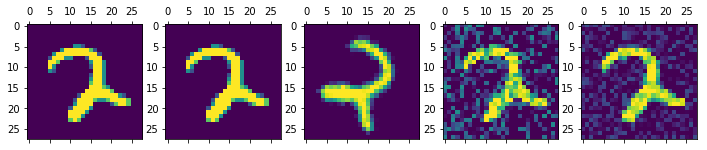

In [0]:
# Visualizamos los datos generados.
idx = 100

fig, axs = plt.subplots(1,5,figsize=(12,12))

axs[0].matshow(augmX_train[idx + len(X_train) * 0,:].reshape(28, 28))
axs[1].matshow(augmX_train[idx + len(X_train) * 1,:].reshape(28, 28))
axs[2].matshow(augmX_train[idx + len(X_train) * 2,:].reshape(28, 28))
axs[3].matshow(augmX_train[idx + len(X_train) * 3,:].reshape(28, 28))
axs[4].matshow(augmX_train[idx + len(X_train) * 4,:].reshape(28, 28))

In [0]:
## Importamos Keras API
import tensorflow as tf

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, ReLU, BatchNormalization

### COMIENZA TU CÓDIGO AQUÍ ###

X_train_reshaped = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train_reshaped.shape)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

model.fit(X_train_reshaped, Y_train, validation_data=(augmX_test, augmY_test),
          batch_size=20, epochs=30)

model.save("models/normal_data.h5")


(14000, 28, 28, 1)
Train on 14000 samples, validate on 30000 samples
Epoch 1/30
14000/14000 [==============================] - 6s 408us/sample - loss: 0.2656 - acc: 0.9139 - val_loss: 1.2278 - val_acc: 0.7410
Epoch 2/30
14000/14000 [==============================] - 5s 388us/sample - loss: 0.0731 - acc: 0.9769 - val_loss: 1.1123 - val_acc: 0.7788
Epoch 3/30
14000/14000 [==============================] - 6s 412us/sample - loss: 0.0429 - acc: 0.9859 - val_loss: 1.2583 - val_acc: 0.7806
Epoch 4/30
14000/14000 [==============================] - 6s 443us/sample - loss: 0.0334 - acc: 0.9885 - val_loss: 1.1593 - val_acc: 0.7704
Epoch 5/30
14000/14000 [==============================] - 5s 392us/sample - loss: 0.0252 - acc: 0.9915 - val_loss: 1.3403 - val_acc: 0.7793
Epoch 6/30
14000/14000 [==============================] - 5s 388us/sample - loss: 0.0227 - acc: 0.9929 - val_loss: 1.4191 - val_acc: 0.7967
Epoch 7/30
14000/14000 [==============================] - 5s 386us/sample - loss: 0.0192 - 

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

model.fit(augmX_train, augmY_train, validation_data=(augmX_test, augmY_test),
          batch_size=20, epochs=30)

model.save("models/augm_data.h5")

Train on 70000 samples, validate on 30000 samples
Epoch 1/30
70000/70000 [==============================] - 18s 260us/sample - loss: 0.2593 - acc: 0.9194 - val_loss: 0.1187 - val_acc: 0.9636
Epoch 2/30
70000/70000 [==============================] - 20s 281us/sample - loss: 0.0805 - acc: 0.9747 - val_loss: 0.0829 - val_acc: 0.9748
Epoch 3/30
70000/70000 [==============================] - 19s 277us/sample - loss: 0.0532 - acc: 0.9824 - val_loss: 0.0795 - val_acc: 0.9756
Epoch 4/30
70000/70000 [==============================] - 18s 255us/sample - loss: 0.0362 - acc: 0.9877 - val_loss: 0.1055 - val_acc: 0.9713
Epoch 5/30
70000/70000 [==============================] - 18s 255us/sample - loss: 0.0290 - acc: 0.9903 - val_loss: 0.1028 - val_acc: 0.9730
Epoch 6/30
70000/70000 [==============================] - 18s 255us/sample - loss: 0.0233 - acc: 0.9923 - val_loss: 0.1174 - val_acc: 0.9705
Epoch 7/30
70000/70000 [==============================] - 19s 270us/sample - loss: 0.0201 - acc: 0.9935 

In [0]:
from tensorflow.keras.models import load_model
model = load_model("models/normal_data.h5")

model.evaluate(augmX_test[:X_test.shape[0]*2], augmY_test[:Y_test.shape[0]*2])

20000/20000 [==============================] - 1s 69us/sample - loss: 2.6035 - acc: 0.7224


[2.6035491574140424, 0.72235]

## 2. (OPCIONAL) Clasificando imágenes reales (CIFAR100 - Dataset)

---

**Tu tarea:**  Una vez ya hemos aprendido a clasificar imágenes de MNIST con una Red Neuronal Convolucional (CNN), no será complicado generalizar nuestro problema a otros datasets más complejos. En este ejercicio probarás a diseñar, entrenar y evaluar a una CNN entrenada en el dataset CIFAR100, para 100 clases de objetos diferentes de imágenes a color (ten en cuenta esto para la definición de las dimensiones). Todo el código implementado ayer para aumentar el dataset, puede ser sustituido por unas pocas lineas de código que hagan uso de la función ***ImageDataGenerator(...)***. Prueba también a aumentar tu dataset haciendo uso de esta funcionalidad. *(En este caso la documentación la encontrarás en la web original de Keras y no en la de Tensorflow.)*

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb

from tensorflow.keras.utils  import to_categorical

import matplotlib.pyplot as plt
import numpy.random

from scipy.ndimage import shift
from scipy.ndimage import rotate
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar100

(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = cifar100.load_data()

Y_train = to_categorical(Y_train_raw, 100)
Y_test = to_categorical(Y_test_raw, 100)

X_train = X_train_raw / 255.
X_test = X_test_raw / 255.

# print(X_train.shape)



# train_generator = generator.flow(X_train_reshaped, Y_train)
# val_generator = generator.flow(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test)

# print(X_test)
# print(Y_test)



Using TensorFlow backend.


169009152/169001437 [==============================] - 53s 0us/step


In [0]:

generator = ImageDataGenerator(rotation_range=90, width_shift_range=0.25,
                               height_shift_range=0.25)

generator.fit(X_train)

train_generator = generator.flow(X_train, Y_train)
val_generator = generator.flow(X_test, Y_test)

In [0]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Activation, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Reshape, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, ReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

clear_session()

model = Sequential()

# model.add(Conv2D(128, (3, 3), padding="same", activation="relu", input_shape=X_train.shape[1:]))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dense(1024, activation="relu"))
# model.add(Dense(100, activation="softmax"))

model.add(Conv2D(128, (3, 3), padding='same',
    input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

model.fit_generator(train_generator, validation_data=val_generator, epochs=30)

model.save("models/cifar100.h5")

Epoch 1/30
1563/1563 [==============================] - 45s 29ms/step - loss: 5.2851 - acc: 0.0299 - val_loss: 15.9572 - val_acc: 0.0100
Epoch 2/30
 272/1563 [====>.........................] - ETA: 31s - loss: 15.9533 - acc: 0.0102

KeyboardInterrupt: ignored